# 意思決定分析と予測の活用 第二部 決定分析の基本 第4章 情報の量

## 5.1 Pythonによる分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
# DataFrameの全角文字の出力をきれいにする
pd.set_option('display.unicode.east_asian_width', True)
# 本文の数値と合わせるために，小数点以下3桁で丸める
pd.set_option('display.precision', 3)

## 5.4.4 Python 実装：関数の作成

In [2]:
def self_info(prob): 
    return(-1 * np.log2(prob))

## 5.4.5 Python 実装：自己情報量の計算

In [3]:
i_6 = self_info(1/6)
print(f'6の目が出たとわかったときの自己情報量：{i_6: .3g}')

6の目が出たとわかったときの自己情報量： 2.58


In [4]:
i_3mul = self_info(1/3)
i_even = self_info(1/2)
print(f'3の倍数とわかったときの自己情報量：{i_3mul: .3g}')
print(f'偶数であるとわかったときの自己情報量：{i_even: .3g}')
print(f'情報を小出しにされたときの自己情報量：{i_3mul + i_even: .3g}')

3の倍数とわかったときの自己情報量： 1.58
偶数であるとわかったときの自己情報量： 1
情報を小出しにされたときの自己情報量： 2.58


## 5.5.5 Python実装：計算方法の確認

In [5]:
# 好況と不況の確率
prob_state = pd.Series([0.4, 0.6])
prob_state.index = ['好況', '不況']
prob_state

好況    0.4
不況    0.6
dtype: float64

In [6]:
# エントロピー計算
H = prob_state[0] * self_info(prob_state[0]) + \
    prob_state[1] * self_info(prob_state[1])
print(f'{H: .3g}')

 0.971


## 5.5.6 Python実装：効率的な実装

In [7]:
from scipy.stats import entropy

In [8]:
H_stats = entropy(prob_state, base = 2)
print(f'{H_stats:.3g}')

0.971


In [9]:
# 確率の合計が1になっていない場合は，勝手に標準化される
H_normalize = entropy(pd.Series([0.2, 0.3]), base=2)
print(f'{H_normalize:.3g}')

0.971


## 5.6 情報エントロピーの性質

In [10]:
# 11種類の確率分布を作る
prob_df = pd.DataFrame({
    'p1': np.arange(start=0, stop=1.1, step=0.1), 
    'p2': 1 - np.arange(start=0, stop=1.1, step=0.1)
})
print(prob_df.head(3))

    p1   p2
0  0.0  1.0
1  0.1  0.9
2  0.2  0.8


In [11]:
# エントロピーの列を作る
prob_df['entropy'] = prob_df[['p1', 'p2']].apply(entropy, axis = 1, base = 2)
print(prob_df.head(3))

    p1   p2  entropy
0  0.0  1.0    0.000
1  0.1  0.9    0.469
2  0.2  0.8    0.722


<AxesSubplot:xlabel='p1'>

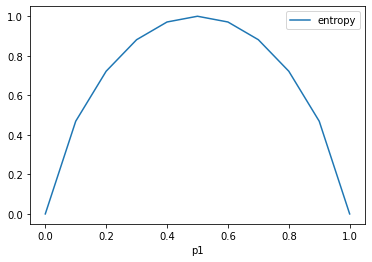

In [12]:
prob_df.plot(x = 'p1', y = 'entropy')